<a href="https://colab.research.google.com/github/vtanoe08/Python_Vincent/blob/main/R_python_combine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#activate R magic
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:14: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex
/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:
# Pandas and numpy for data manipulation https://github.com/WillKoehrsen/Data-Analysis/blob/master/bayesian_lr/Bayesian%20Linear%20Regression%20Project.ipynb
import pandas as pd
import numpy as np
import theano

# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression

# Scipy for statistics
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

In [ ]:
wind=pd.read_csv("winds.csv")
wind.describe().round(2)

,Bear Creek,Frey Farm,Criterion Wind Park,NedPower,Humboldt,LocustRidge,Roth Rock,Talbot,Mountaineer,BuffaloMountain,BitWorks,MtPeakUtility,Anacacho,DryLake,Kingman
count,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00
mean,7.66,5.73,8.23,7.66,7.66,5.41,7.05,6.63,8.75,7.55,7.04,7.73,7.37,6.00,7.16
std,3.64,3.32,4.42,3.94,3.58,3.36,3.81,3.25,5.42,4.02,3.48,3.48,3.18,3.43,3.70
min,0.21,0.04,0.15,0.15,0.12,0.05,0.10,0.10,0.16,0.16,0.08,0.10,0.06,0.09,0.06
25%,5.03,3.19,4.85,4.76,5.04,3.03,4.19,4.19,4.50,4.47,4.46,4.98,4.97,3.31,4.36
50%,7.27,5.35,7.60,7.15,7.36,4.85,6.58,6.40,7.68,7.00,6.92,7.85,7.32,5.52,6.89
75%,9.86,7.95,10.98,10.09,9.89,7.15,9.41,8.81,11.86,10.06,9.43,10.36,9.71,8.23,9.61
max,28.51,22.17,26.02,23.28,26.66,26.23,22.30,23.95,29.10,24.99,20.66,19.15,21.61,25.12,21.19


In [ ]:
%%R
library('dplyr')


R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [ ]:
%%R
head(wind[,c(2,4,6)])

  Frey.Farm NedPower LocustRidge
1      4.40    10.33        7.73
2      5.16    10.51        9.13
3      4.80     8.74        5.73
4      5.89     8.67        2.96
5      2.42     8.81        2.31
6      1.36     8.15        1.66


In [ ]:
%%R
wind=read.csv('winds.csv')
wind1=read.csv('small.csv')
wind2=read.csv('medium.csv')


In [ ]:
%%R
t=tapply(wind$Humboldt,wind$NedPower,FUN=mean,na.rm=TRUE)
head(t)

0.15 0.25 0.29  0.3 0.33 0.34 
4.72 8.24 4.45 2.86 2.76 7.56 


In [ ]:
%%R
attach(wind)
names(wind)

 [1] "Bear.Creek"          "Frey.Farm"           "Criterion.Wind.Park"
 [4] "NedPower"            "Humboldt"            "LocustRidge"        
 [7] "Roth.Rock"           "Talbot"              "Mountaineer"        
[10] "BuffaloMountain"     "BitWorks"            "MtPeakUtility"      
[13] "Anacacho"            "DryLake"             "Kingman"            


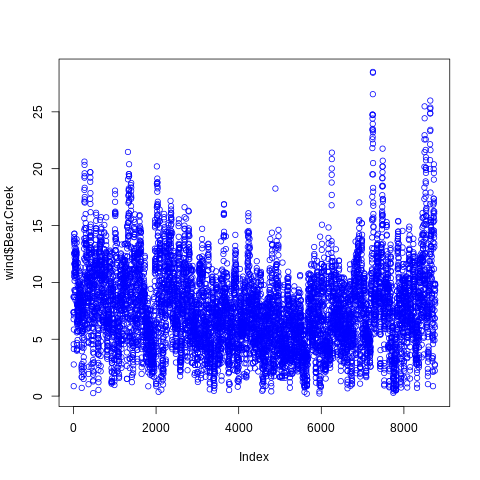

In [ ]:
%%R
plot(wind$Bear.Creek, col='blue')

In [ ]:
%%R
M=cor(dplyr::select(wind,1:5))
install.packages('corrplot')
library(corrplot)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/corrplot_0.84.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 5385275 bytes (5.1 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

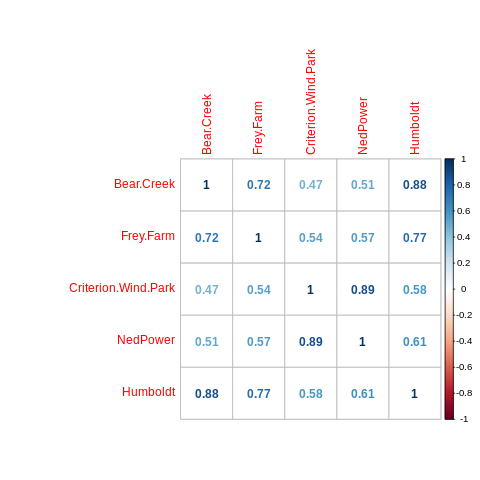

In [ ]:
%%R
corrplot(M,method='number')

In [ ]:
%%R
data1=dplyr::select(wind,c(5,4,3,7,2,1,9,6,12))
data2=dplyr::select(wind1,c(5,4,3,7,2,1,9,6,12))
data3=dplyr::select(wind2,c(5,4,3,7,2,1,9,6,12))
head(data1)

  Humboldt NedPower Criterion.Wind.Park Roth.Rock Frey.Farm Bear.Creek
1    10.14    10.33                9.80      8.30      4.40       8.73
2     7.73    10.51                9.84      9.11      5.16       7.37
3     6.90     8.74                9.15      8.59      4.80       7.38
4     8.33     8.67                9.48      8.26      5.89       6.76
5     6.47     8.81               10.20      9.60      2.42       4.55
6     5.63     8.15               10.69      8.74      1.36       0.87
  Mountaineer LocustRidge MtPeakUtility
1        9.60        7.73         16.72
2        9.26        9.13         17.27
3        8.05        5.73         16.06
4        8.03        2.96         16.13
5        6.96        2.31         13.58
6        6.01        1.66         12.67


In [ ]:
%%R
install.packages('leaps')
library('leaps')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/leaps_3.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 28558 bytes (27 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to c

In [ ]:
%%R
## best subset regression in R
X=data1[,2:9]
y=data1[,1]
out=summary(regsubsets(X,y,nbest=2,nvmax=ncol(X)))
tab=cbind(out$which,out$rsq,out$adjr2,out$cp)
tab

  (Intercept) NedPower Criterion.Wind.Park Roth.Rock Frey.Farm Bear.Creek
1           1        0                   0         0         0          1
1           1        0                   0         0         1          0
2           1        0                   0         0         1          1
2           1        0                   1         0         0          1
3           1        0                   1         0         1          1
3           1        1                   0         0         1          1
4           1        0                   1         0         1          1
4           1        1                   1         0         1          1
5           1        0                   1         0         1          1
5           1        1                   1         0         1          1
6           1        1                   1         0         1          1
6           1        0                   1         1         1          1
7           1        1                

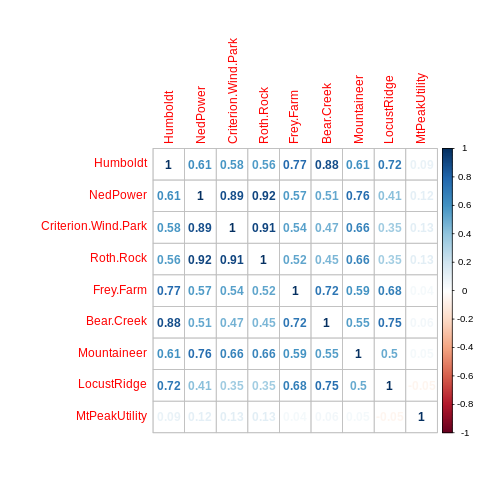

In [ ]:
%%R
x=cor(data1)
corrplot(x,method='number')

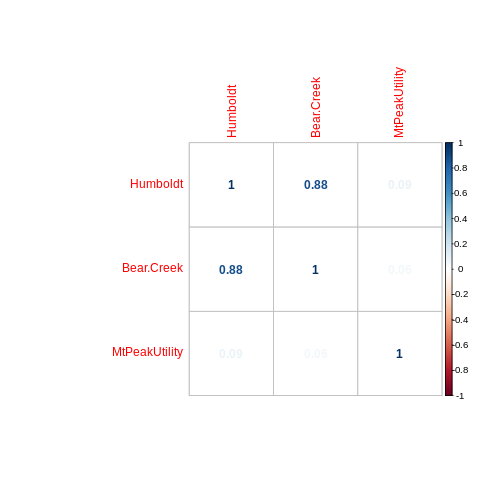

In [ ]:
%%R
x2=dplyr::select(data1,c(1,6,9))
x3=dplyr::select(data2,c(1,6,9))
x4=dplyr::select(data3,c(1,6,9))
y=cor(x2)
corrplot(y,method='number')

In [ ]:
%%R
model=lm(Humboldt~.,data=x3)
summary(model)


Call:
lm(formula = Humboldt ~ ., data = x3)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1838 -0.3123 -0.0293  0.2213  3.7773 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -0.11732    0.58968  -0.199    0.843    
BearCreek      0.94540    0.05634  16.779   <2e-16 ***
MtPeakUtility  0.07615    0.07227   1.054    0.297    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6814 on 50 degrees of freedom
Multiple R-squared:  0.8686,	Adjusted R-squared:  0.8633 
F-statistic: 165.3 on 2 and 50 DF,  p-value: < 2.2e-16



In [ ]:
%%R
vif(model)


   Bear.Creek MtPeakUtility 
     1.003187      1.003187 


In [ ]:
1/(1-0.77)

4.347826086956522

In [ ]:
%%R
head(dplyr::select(wind,1:3)%>%mutate(select(wind,1:3),gor=wind$Bear.Creek/wind$Frey.Farm),5)

R[write to console]: Error in dplyr::select(wind, 1:3) %>% mutate(select(wind, 1:3), gor = wind$Bear.Creek/wind$Frey.Farm) : 
  could not find function "%>%"
Calls: <Anonymous> -> <Anonymous> -> withVisible -> head




Error in dplyr::select(wind, 1:3) %>% mutate(select(wind, 1:3), gor = wind$Bear.Creek/wind$Frey.Farm) : 
  could not find function "%>%"
Calls: <Anonymous> -> <Anonymous> -> withVisible -> head


In [ ]:
%%R
dim(wind)

[1] 8760   15


In [ ]:
w=pd.read_csv('winds.csv')

In [ ]:
print(w.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Bear Creek           8760 non-null   float64
 1   Frey Farm            8760 non-null   float64
 2   Criterion Wind Park  8760 non-null   float64
 3   NedPower             8760 non-null   float64
 4   Humboldt             8760 non-null   float64
 5   LocustRidge          8760 non-null   float64
 6   Roth Rock            8760 non-null   float64
 7   Talbot               8760 non-null   float64
 8   Mountaineer          8760 non-null   float64
 9   BuffaloMountain      8760 non-null   float64
 10  BitWorks             8760 non-null   float64
 11  MtPeakUtility        8760 non-null   float64
 12  Anacacho             8760 non-null   float64
 13  DryLake              8760 non-null   float64
 14  Kingman              8760 non-null   float64
dtypes: float64(15)
memory usage: 1.0 MB
No

In [ ]:
%%R
summary(wind)

   Bear.Creek       Frey.Farm      Criterion.Wind.Park    NedPower     
 Min.   : 0.210   Min.   : 0.040   Min.   : 0.150      Min.   : 0.150  
 1st Qu.: 5.027   1st Qu.: 3.190   1st Qu.: 4.848      1st Qu.: 4.760  
 Median : 7.270   Median : 5.350   Median : 7.605      Median : 7.150  
 Mean   : 7.665   Mean   : 5.731   Mean   : 8.230      Mean   : 7.664  
 3rd Qu.: 9.860   3rd Qu.: 7.950   3rd Qu.:10.980      3rd Qu.:10.092  
 Max.   :28.510   Max.   :22.170   Max.   :26.020      Max.   :23.280  
    Humboldt       LocustRidge       Roth.Rock          Talbot      
 Min.   : 0.120   Min.   : 0.050   Min.   : 0.100   Min.   : 0.100  
 1st Qu.: 5.040   1st Qu.: 3.030   1st Qu.: 4.188   1st Qu.: 4.190  
 Median : 7.355   Median : 4.850   Median : 6.585   Median : 6.400  
 Mean   : 7.656   Mean   : 5.407   Mean   : 7.046   Mean   : 6.634  
 3rd Qu.: 9.890   3rd Qu.: 7.150   3rd Qu.: 9.412   3rd Qu.: 8.810  
 Max.   :26.660   Max.   :26.230   Max.   :22.300   Max.   :23.950  
  Mountaineer

In [ ]:
%%R
library(grid)
install.packages("tidyverse")
install.packages('gridExtra')
library(gridExtra)
library(rstan)
library(rstanarm)
library(ggplot2)
library(ggplot)
library(bayesplot)
library(caTools)
library(car)
library(reshape2)
library(hydroTSM)
library(data.table)
library(lme4)
library(mice)
library(brms)
library(data.table)
install.packages("dplyr")
library(dplyr)
install.packages('corrplot')
install.packages('mlbench')
install.packages('caret')
library(mlbench)
library(caret)
library(corrplot)
library(ggplot2)
install.packages('GGally')
install.packages('BAS')
install.packages('MASS')
library(GGally)
library(BAS)
library(MASS)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_1.3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 712837 bytes (696 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr


Error in library(rstan) : there is no package called ‘rstan’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library


In [ ]:
%%R
data1=dplyr::select(wind,Bear.Creek,Humboldt,LocustRidge,Talbot,Frey.Farm,BuffaloMountain)
head(data1)

  Bear.Creek Humboldt LocustRidge Talbot Frey.Farm BuffaloMountain
1       8.73    10.14        7.73   7.07      4.40           13.25
2       7.37     7.73        9.13   6.65      5.16           12.68
3       7.38     6.90        5.73   5.94      4.80           13.44
4       6.76     8.33        2.96   4.64      5.89           13.97
5       4.55     6.47        2.31   3.55      2.42           15.06
6       0.87     5.63        1.66   3.01      1.36           15.66


In [ ]:
%%R
install.packages('tseries')
library(tseries)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/xts_0.12.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 517875 bytes (505 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

In [ ]:
%%R
install.packages('car')
library('car')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘data.table’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/matrixStats_0.57.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 188895 bytes (184 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =

In [ ]:

data1=pd.read_csv('data1.csv')

In [ ]:
data1.columns

Index(['Unnamed: 0', 'Bear.Creek', 'Humboldt', 'LocustRidge', 'Talbot',
       'Frey.Farm', 'BuffaloMountain'],
      dtype='object')

In [ ]:
%%R
text=lm(Humboldt~Bear.Creek+BuffaloMountain,data=data1)
summary(text)


Call:
lm(formula = Humboldt ~ Bear.Creek + BuffaloMountain, data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.3631  -1.0069  -0.1250   0.9205  13.7475 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.561692   0.047177   11.91   <2e-16 ***
Bear.Creek      0.837953   0.005090  164.64   <2e-16 ***
BuffaloMountain 0.088893   0.004617   19.25   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.654 on 8757 degrees of freedom
Multiple R-squared:  0.787,	Adjusted R-squared:  0.787 
F-statistic: 1.618e+04 on 2 and 8757 DF,  p-value: < 2.2e-16



In [ ]:
%%R
car::vif(text)

R[write to console]: Error in loadNamespace(name) : there is no package called ‘car’
Calls: <Anonymous> ... loadNamespace -> withRestarts -> withOneRestart -> doWithOneRestart




Error in loadNamespace(name) : there is no package called ‘car’
Calls: <Anonymous> ... loadNamespace -> withRestarts -> withOneRestart -> doWithOneRestart


In [ ]:
data1=data1.drop(['Unnamed: 0'],axis=1) 

In [ ]:
data1.iloc[:,[1,5]].corr().round(2)

,Humboldt,BuffaloMountain
Humboldt,1.00,0.36
BuffaloMountain,0.36,1.00


In [ ]:
%%R
round(cor(data1[,c(1,3,4,5,6)]),2)

                Bear.Creek LocustRidge Talbot Frey.Farm BuffaloMountain
Bear.Creek            1.00        0.75   0.63      0.72            0.30
LocustRidge           0.75        1.00   0.55      0.68            0.18
Talbot                0.63        0.55   1.00      0.68            0.31
Frey.Farm             0.72        0.68   0.68      1.00            0.31
BuffaloMountain       0.30        0.18   0.31      0.31            1.00


In [ ]:
data.iloc[:,[]]

In [ ]:
%%R
install.packages('GGally')
library(GGally)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘plyr’, ‘reshape’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/plyr_1.8.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 401191 bytes (391 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [ ]:
#regression ols
%%R
ols=lm(Bear.Creek~.,data=data1)
summary(ols)


Call:
lm(formula = Bear.Creek ~ ., data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7932  -0.8912  -0.0374   0.8891  13.4696 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.5704851  0.0469156  12.160   <2e-16 ***
Humboldt        0.6812545  0.0085902  79.306   <2e-16 ***
LocustRidge     0.2499657  0.0077006  32.461   <2e-16 ***
Talbot          0.0758692  0.0074099  10.239   <2e-16 ***
Frey.Farm       0.0038099  0.0089445   0.426    0.670    
BuffaloMountain 0.0003004  0.0046208   0.065    0.948    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.591 on 8754 degrees of freedom
Multiple R-squared:  0.8094,	Adjusted R-squared:  0.8093 
F-statistic:  7436 on 5 and 8754 DF,  p-value: < 2.2e-16



In [ ]:
%%R
ols2=lm(Bear.Creek~Humboldt +LocustRidge+Talbot+Frey.Farm+BuffaloMountain+LocustRidge*Talbot+
        Frey.Farm*BuffaloMountain,data=data1)
summary(ols2)


Call:
lm(formula = Bear.Creek ~ Humboldt + LocustRidge + Talbot + Frey.Farm + 
    BuffaloMountain + LocustRidge * Talbot + Frey.Farm * BuffaloMountain, 
    data = data1)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8150  -0.8886  -0.0366   0.8947  13.4978 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.489517   0.079873   6.129 9.24e-10 ***
Humboldt                   0.679217   0.008608  78.903  < 2e-16 ***
LocustRidge                0.202168   0.013251  15.257  < 2e-16 ***
Talbot                     0.048516   0.010019   4.842 1.31e-06 ***
Frey.Farm                  0.059111   0.013783   4.289 1.82e-05 ***
BuffaloMountain            0.040042   0.009154   4.374 1.23e-05 ***
LocustRidge:Talbot         0.005338   0.001175   4.543 5.61e-06 ***
Frey.Farm:BuffaloMountain -0.006414   0.001244  -5.157 2.56e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.5

In [ ]:
%%R
ks.test(ols1[['residuals']],y='pnorm')


	One-sample Kolmogorov-Smirnov test

data:  ols1[["residuals"]]
D = 0.09502, p-value < 2.2e-16
alternative hypothesis: two-sided



In [ ]:
%%R
ks.test(data1$Bear.Creek,data1$Humboldt)


	Two-sample Kolmogorov-Smirnov test

data:  data1$Bear.Creek and data1$Humboldt
D = 0.014155, p-value = 0.344
alternative hypothesis: two-sided



In [ ]:
%%R
ks.test(data1$Bear.Creek,data1$Frey.Farm)


	Two-sample Kolmogorov-Smirnov test

data:  data1$Bear.Creek and data1$Frey.Farm
D = 0.22078, p-value < 2.2e-16
alternative hypothesis: two-sided



In [ ]:
%%R
install.packages('dgof')
library(dgof)

UsageError: Cell magic `%%R` not found.


In [ ]:
%%R
sample1<-data1$Bear.Creek
sample2<-data1$Talbot
group <- c(rep("sample1", length(sample1)), rep("sample2", length(sample2)))
dat <- data.frame(KSD = c(sample1,sample2), group = group)
# create ECDF of data
cdf1 <- ecdf(sample1) 
cdf2 <- ecdf(sample2) 
# find min and max statistics to draw line between points of greatest distance
minMax <- seq(min(sample1,sample2), max(sample1,sample2), length.out=length(sample1)) 
x0 <- minMax[which( abs(cdf1(minMax) - cdf2(minMax)) == max(abs(cdf1(minMax) - cdf2(minMax))) )] 
y0 <- cdf1(x0) 
y1 <- cdf2(x0) 


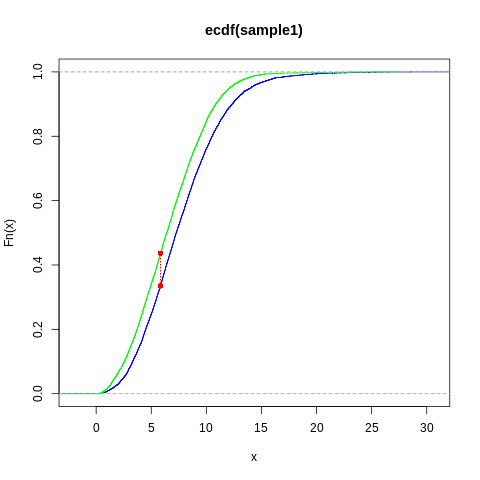

In [ ]:
%%R
######################### non ggplot example
plot(cdf1, verticals=TRUE, do.points=FALSE, col="blue") 
plot(cdf2, verticals=TRUE, do.points=FALSE, col="green", add=TRUE) 
## alternatine, use standard R plot of ecdf 
#plot(f.a, col="blue") 
#lines(f.b, col="green") 

points(c(x0, x0), c(y0, y1), pch=16, col="red") 
segments(x0, y0, x0, y1, col="red", lty="dotted") 

In [ ]:
# png(file = "c:/temp/ks.png", width = 1024, height = 768, type="cairo-png")
'''ggplot(dat, aes(x = KSD, group = group, color = group))+
  stat_ecdf(size=1) +
    theme_bw(base_size = 14) +
    theme(legend.position ="top") +
    xlab("Sample") +
    ylab("ECDF") +
    #geom_line(size=1) +
    geom_segment(aes(x = x0[1], y = y0[1], xend = x0[1], yend = y1[1]),
        linetype = "dashed", color = "red") +
    geom_point(aes(x = x0[1] , y= y0[1]), color="red", size=4) +
    geom_point(aes(x = x0[1] , y= y1[1]), color="red", size=4) +
    ggtitle("K-S Test: sample1/ sample2") +
    theme(legend.title=element_blank())'''

In [ ]:
%%R
write.csv(data1,file='data1.csv')

Model with 4380 observations which is half of the data

In [ ]:
data1=pd.read_csv('data1.csv')

In [ ]:
data1.iloc[:,2:].head()

,Humboldt,LocustRidge,Talbot,Frey.Farm,BuffaloMountain
0,10.14,7.73,7.07,4.40,13.25
1,7.73,9.13,6.65,5.16,12.68
2,6.90,5.73,5.94,4.80,13.44
3,8.33,2.96,4.64,5.89,13.97
4,6.47,2.31,3.55,2.42,15.06


In [ ]:
y=data1.loc[0:4379, 'Bear.Creek']
X=data1.loc[0:4379,'Humboldt']
X1=data1.loc[:,['Intercept','Humboldt','LocustRidge','Talbot','Frey.Farm','BuffaloMountain']]
y1=data1.loc[:, 'Bear.Creek']
data1['Intercept']=1

**Implement Ordinary Least Squares Linear Regression**

In [ ]:
# Run the by hand implementation
lr = LinearRegression()
lr.fit(X1, y1)
print('Intercept from library:', lr.intercept_)
print('Slope from Humboldt:', lr.coef_[1])
print('Slope from LocustRidge:', lr.coef_[2])
print('Slope from Talbot:', lr.coef_[2])
print('Slope from Frey.Farm:', lr.coef_[4])
print('Slope from BuffaloMountain:', lr.coef_[5])

Intercept from library: 0.5704850847769993
Slope from Humboldt: 0.6812545109305752
Slope from LocustRidge: 0.24996571673881626
Slope from Talbot: 0.24996571673881626
Slope from Frey.Farm: 0.0038098876257815495
Slope from BuffaloMountain: 0.000300354795548019


In [ ]:
#Bayesian Linear Regression in python
with pm.Model() as linear_model_4380:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sd = 10)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0, sd = 10)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of mean
    mean = intercept + slope * data1.loc[0:4379,'Humboldt']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed =y.values[0:4380])
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace_4380 = pm.sample(8760, step)

Sequential sampling (2 chains in 1 job)
NUTS: [sigma, slope, Intercept]
Sampling chain 1, 0 divergences: 100%|██████████| 9260/9260 [00:24<00:00, 373.17it/s]
The acceptance probability does not match the target. It is 0.8957138875538049, but should be close to 0.8. Try to increase the number of tuning steps.


Model with all Obsersations

In [ ]:
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 0, sd = 10)
    
    # Slope 
    slope = pm.Normal('slope', mu = 0, sd = 10)
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of mean
    mean = intercept + slope * data1.loc[:, 'Humboldt']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = y1.values)
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_trace = pm.sample(8760, step)

Sequential sampling (2 chains in 1 job)
NUTS: [sigma, slope, Intercept]
Sampling chain 1, 0 divergences: 100%|██████████| 9260/9260 [00:36<00:00, 253.75it/s]
The acceptance probability does not match the target. It is 0.9102331403546681, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9265806572228612, but should be close to 0.8. Try to increase the number of tuning steps.


Trace of All Model Parameters

In [ ]:
!pip install arviz

/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
/usr/local/lib/python3.6/dist-packages/arviz/plots/backends/matplotlib/distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not 

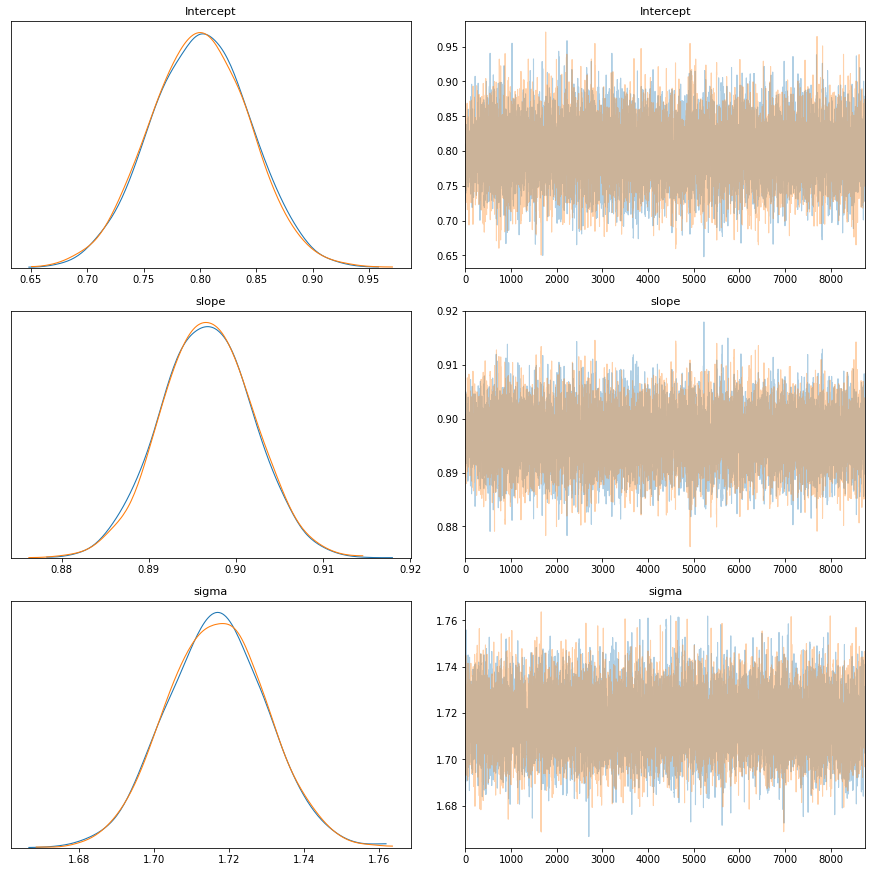

In [ ]:
pm.traceplot(linear_trace, figsize = (12, 12));

**Posterior Distribution Model Parameters**

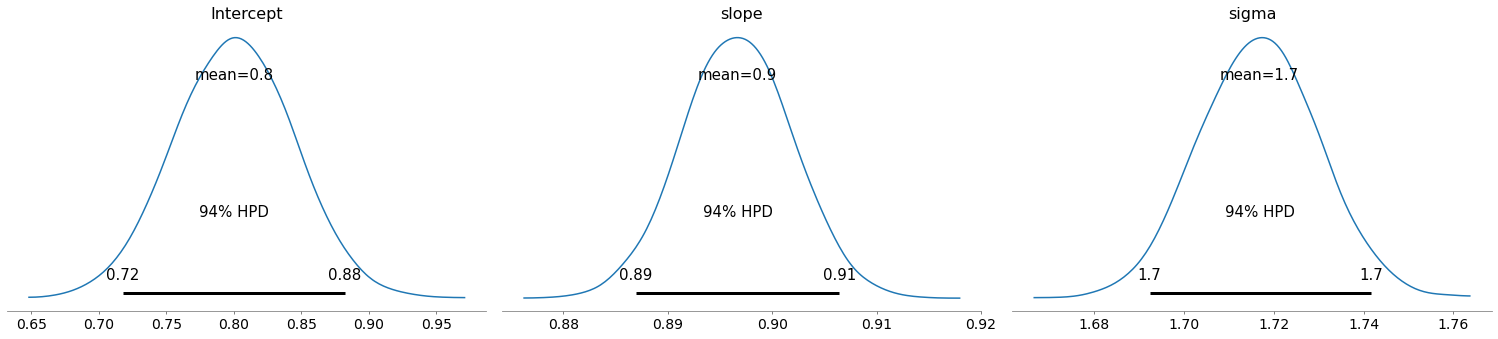

In [ ]:
pm.plot_posterior(linear_trace);

**Confidence Interval for Model Parameters**

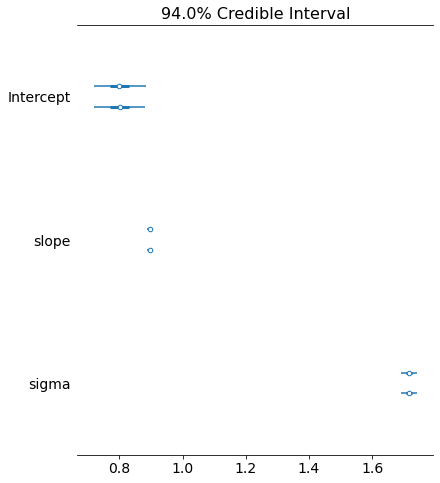

In [ ]:
pm.forestplot(linear_trace);


**Predictions of Response Sampled from the Posterior**,
We can now generate predictions of the linear regression line using the model results. The following plot shows 8760 different estimates of the regression line drawn from the posterior. The distribution of the lines gives an estimate of the uncertainty in the estimate. Bayesian Linear Regression has the benefit that it gives us a posterior distribution rather than a single point estimate in the frequentist ordinary least squares regression.

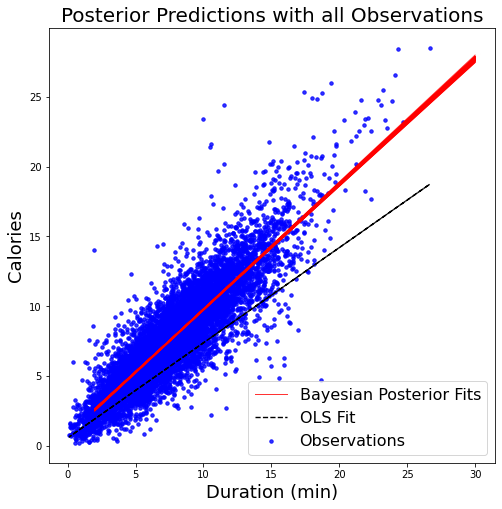

In [ ]:
plt.figure(figsize = (8, 8))
pm.plot_posterior_predictive_glm(linear_trace, samples = 100, eval=np.linspace(2, 30, 100), linewidth = 1, 
                                 color = 'red', alpha = 0.8, label = 'Bayesian Posterior Fits',
                                lm = lambda x, sample: sample['Intercept'] + sample['slope'] * x);
plt.scatter(X1['Humboldt'], y1.values, s = 12, alpha = 0.8, c = 'blue', label = 'Observations')
plt.plot(X1['Humboldt'], lr.intercept_ + X1['Humboldt'] * lr.coef_[1], 'k--', label = 'OLS Fit', linewidth = 1.4)
plt.title('Posterior Predictions with all Observations', size = 20); plt.xlabel('Duration (min)', size = 18);
plt.ylabel('Calories', size = 18);
plt.legend(prop={'size': 16});

In [ ]:
pm.summary( linear_trace_4380)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,0.994,0.068,0.871,1.121,0.001,0.001,6275.0,6275.0,6267.0,7117.0,1.0
slope,0.868,0.008,0.853,0.882,0.000,0.000,6322.0,6320.0,6322.0,7258.0,1.0
sigma,1.732,0.019,1.698,1.768,0.000,0.000,8993.0,8993.0,8969.0,8440.0,1.0


In [ ]:
pm.summary( linear_trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept,0.800,0.044,0.718,0.882,0.001,0.0,7206.0,7206.0,7200.0,7277.0,1.0
slope,0.897,0.005,0.887,0.906,0.000,0.0,7209.0,7204.0,7216.0,7231.0,1.0
sigma,1.717,0.013,1.692,1.742,0.000,0.0,8260.0,8258.0,8272.0,7885.0,1.0


In [ ]:
X2=data1.copy()

In [ ]:
X2.head()

,Unnamed: 0,Bear.Creek,Humboldt,LocustRidge,Talbot,Frey.Farm,BuffaloMountain,Intercept
0,1,8.73,10.14,7.73,7.07,4.40,13.25,1
1,2,7.37,7.73,9.13,6.65,5.16,12.68,1
2,3,7.38,6.90,5.73,5.94,4.80,13.44,1
3,4,6.76,8.33,2.96,4.64,5.89,13.97,1
4,5,4.55,6.47,2.31,3.55,2.42,15.06,1


In [ ]:
X1.head()

,Intercept,Humboldt,LocustRidge,Talbot,Frey.Farm,BuffaloMountain
0,1,10.14,7.73,7.07,4.40,13.25
1,1,7.73,9.13,6.65,5.16,12.68
2,1,6.90,5.73,5.94,4.80,13.44
3,1,8.33,2.96,4.64,5.89,13.97
4,1,6.47,2.31,3.55,2.42,15.06


In [ ]:
%%R
#Bayesian GLM 
glm1=glm(formula=Bear.Creek~.,data=data1, family=gaussian)
summary(glm1)


Call:
glm(formula = Bear.Creek ~ ., family = gaussian, data = data1)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-10.7932   -0.8912   -0.0374    0.8891   13.4696  

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.5704851  0.0469156  12.160   <2e-16 ***
Humboldt        0.6812545  0.0085902  79.306   <2e-16 ***
LocustRidge     0.2499657  0.0077006  32.461   <2e-16 ***
Talbot          0.0758692  0.0074099  10.239   <2e-16 ***
Frey.Farm       0.0038099  0.0089445   0.426    0.670    
BuffaloMountain 0.0003004  0.0046208   0.065    0.948    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 2.530956)

    Null deviance: 116256  on 8759  degrees of freedom
Residual deviance:  22156  on 8754  degrees of freedom
AIC: 33002

Number of Fisher Scoring iterations: 2



In [ ]:
%%R
install.packages('arm')
library(arm)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘data.table’, ‘htmlTable’, ‘viridis’, ‘lme4’, ‘abind’, ‘coda’, ‘Hmisc’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/png_0.1-7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 24990 bytes (24 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [ ]:
%%R
#Bayesian Generalized linear model
bayGLM=arm::bayesglm(Humboldt~.,data=x2,
                prior.mean=0,prior.scale=Inf, prior.df=Inf)
summary(bayGLM)


Call:
arm::bayesglm(formula = Humboldt ~ ., data = x2, prior.mean = 0, 
    prior.scale = Inf, prior.df = Inf)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-11.1490   -1.0214   -0.1376    0.9528   13.1351  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.671201   0.056393  11.902   <2e-16 ***
Bear.Creek    0.865158   0.004938 175.194   <2e-16 ***
MtPeakUtility 0.045658   0.005166   8.838   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 2.826083)

    Null deviance: 112482  on 8759  degrees of freedom
Residual deviance:  24748  on 8757  degrees of freedom
AIC: 33965

Number of Fisher Scoring iterations: 4



In [ ]:
%%R
nrow(x4)

[1] 365


In [ ]:
bayGLM1=arm::bayesglm(Humboldt~.,data=x4,
                prior.mean=0,prior.scale=Inf, prior.df=Inf)
summary(bayGLM1)

The bayesglm function represents a kind of short cut of the Bayesian approach to inference. Typically, the posterior is not used directly for making inferences. Instead, an empirical distribution is constructed based on draws from the posterior and that empirical distribution is what informs the inference(s). Here, we are using the bayesglm as a proxy for doing the added empirical distribution. With the bayesglm we get a distribution of ’simulates’ which are used in place of an actual empirical distribution (which will be covered further below)

Retrieve the posterior distributions of the coefficients for the intercept and all three predictors. The head function simply lists the first 10 rows of the object on which it is run (the default head is the first 6).

In [ ]:
%%R
simulate=coef(sim(bayGLM))
head(simulate,10)


      (Intercept)  Humboldt LocustRidge     Talbot    Frey.Farm BuffaloMountain
 [1,]   0.4666322 0.7070061   0.2388250 0.09111946 -0.014635922    -0.003023199
 [2,]   0.5747318 0.6748926   0.2454383 0.08056506  0.010841241    -0.001760956
 [3,]   0.5765860 0.6840065   0.2425326 0.07705615  0.011120604    -0.004731303
 [4,]   0.5451858 0.6843729   0.2655631 0.06824190 -0.001632376     0.002712290
 [5,]   0.5305661 0.6964826   0.2479730 0.07799622 -0.007793070    -0.007764470
 [6,]   0.5457855 0.6896921   0.2385794 0.07958423  0.013048198    -0.006004258
 [7,]   0.5711126 0.6781613   0.2517881 0.07507615  0.009170119    -0.002352152
 [8,]   0.6073920 0.6642706   0.2610329 0.07284794  0.010055866     0.005595142
 [9,]   0.5672984 0.6677061   0.2481483 0.07922233  0.020491264    -0.003610000
[10,]   0.5490636 0.6802685   0.2422938 0.07437262  0.007305110     0.006767528


Extract just the posterior distribution of the ’open’ variable’s coefficient. Again, the head function simply lists the first 10 items of the object.

In [ ]:
%%R
posterior<-simulate[,]
head(posterior,5)

     (Intercept)  Humboldt LocustRidge     Talbot    Frey.Farm BuffaloMountain
[1,]   0.4666322 0.7070061   0.2388250 0.09111946 -0.014635922    -0.003023199
[2,]   0.5747318 0.6748926   0.2454383 0.08056506  0.010841241    -0.001760956
[3,]   0.5765860 0.6840065   0.2425326 0.07705615  0.011120604    -0.004731303
[4,]   0.5451858 0.6843729   0.2655631 0.06824190 -0.001632376     0.002712290
[5,]   0.5305661 0.6964826   0.2479730 0.07799622 -0.007793070    -0.007764470


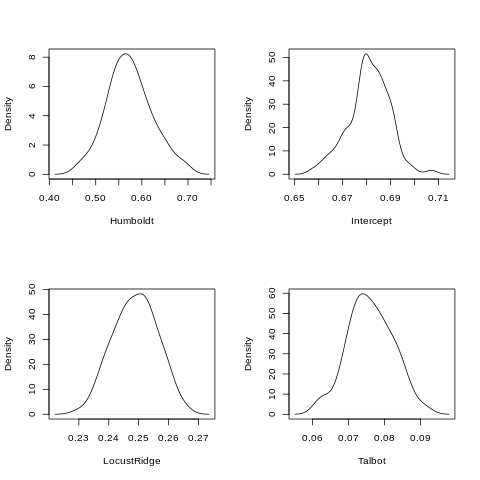

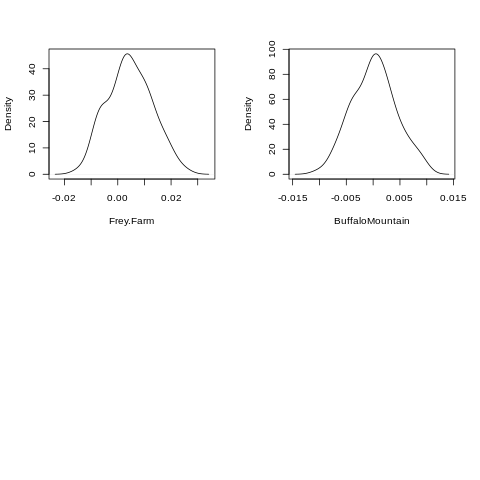

In [ ]:
%%R
par(mfrow=c(2,2))
plot(density(posterior[,1]),main="",xlab='Intercept')
plot(density(posterior[,2]),main="",xlab='Humboldt')
plot(density(posterior[,3]),main="",xlab='LocustRidge')
plot(density(posterior[,4]),main="",xlab='Talbot')
plot(density(posterior[,5]),main="",xlab='Frey.Farm')
plot(density(posterior[,6]),main="",xlab='BuffaloMountain')

Going further entails actually creating an empirical distribution based on iterative draws from the posterior. The MCMCregress function in the package ‘MCMCpack’ provides us with the Markov Chain Monte Carlo simulation method of creating the empirical distribution; which itself allows us to then compute the descriptive statistics used for inference. Meaning, the mode, median, or mean of the empirical MCMC simulates’ distribution is the ’maximum likelihood’ estimate (i.e. top of a density function) of the population parameter. The MCMCregress function also gives us the credible interval which includes the actual population parame- ter value

In [ ]:
%%R
install.packages('MCMCpack')
library(MCMCpack)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘mcmc’, ‘quantreg’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/matrixStats_0.57.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 188895 bytes (184 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

In [ ]:
%%R
modelmcm=MCMCregress(Humboldt~.,data=x2,family=gaussian,
                     burnin=1000,mcmc=1000,thin=1,
                     verbose=0)
summary(modelmcm)


Iterations = 1001:2000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                Mean       SD  Naive SE Time-series SE
(Intercept)   0.6754 0.055516 0.0017556      0.0015056
Bear.Creek    0.8649 0.004737 0.0001498      0.0001498
MtPeakUtility 0.0455 0.005229 0.0001653      0.0001511
sigma2        2.8262 0.043548 0.0013771      0.0013771

2. Quantiles for each variable:

                 2.5%     25%     50%    75%   97.5%
(Intercept)   0.56712 0.63751 0.67503 0.7134 0.78038
Bear.Creek    0.85498 0.86171 0.86494 0.8681 0.87383
MtPeakUtility 0.03538 0.04199 0.04562 0.0490 0.05596
sigma2        2.73911 2.79707 2.82646 2.8573 2.91005



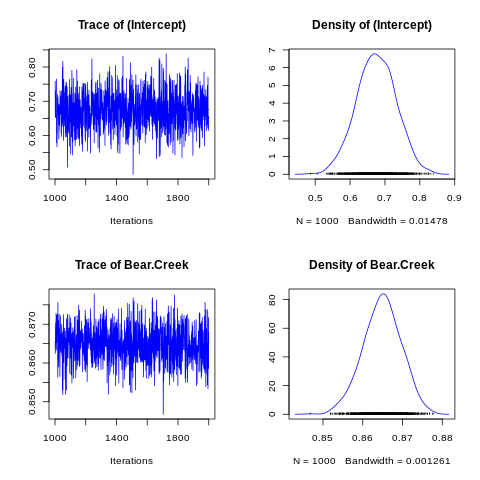

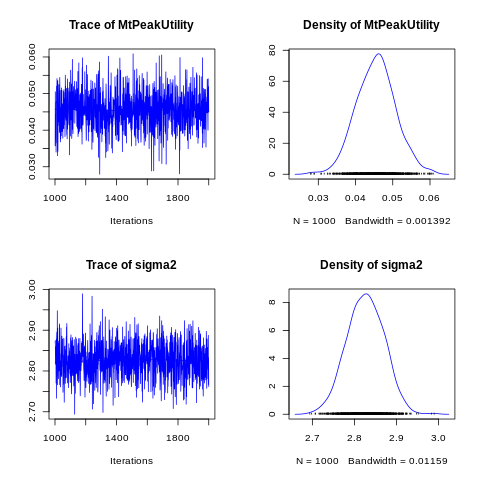

In [ ]:
%%R
par(mfrow=c(2,2))
plot(modelmcm,trace = TRUE, density = TRUE, smooth = TRUE,
        auto.layout = FALSE, ask = TRUE, col='blue',pch=10)

In [ ]:
%%R
raftery.diag(modelmcm)

R[write to console]: Error in raftery.diag(modelmcm) : could not find function "raftery.diag"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in raftery.diag(modelmcm) : could not find function "raftery.diag"
Calls: <Anonymous> -> <Anonymous> -> withVisible


**LASSO FEATURE SELECTION**

In [ ]:
%%R
install.packages('glmnet')
library('glmnet')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/iterators_1.0.13.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 288559 bytes (281 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [ ]:
%%R
install.packages('plotmo')
library(plotmo)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘Formula’, ‘plotrix’, ‘TeachingDemos’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/Formula_1.2-4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 164214 bytes (160 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wr

In [ ]:
#Lasso selection
%%R
c=glmnet(as.matrix(wind[-1]),wind[,1],
         standardize=TRUE,aplha=1)

R[write to console]: Error in glmnet(as.matrix(wind[-1]), wind[, 1], standardize = TRUE, aplha = 1) : 
  could not find function "glmnet"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in glmnet(as.matrix(wind[-1]), wind[, 1], standardize = TRUE, aplha = 1) : 
  could not find function "glmnet"
Calls: <Anonymous> -> <Anonymous> -> withVisible


15 x 1 sparse Matrix of class "dgCMatrix"
                                1
(Intercept)          0.4977813381
Frey.Farm            0.0167688582
Criterion.Wind.Park -0.0182819020
NedPower             .           
Humboldt             0.7045700780
LocustRidge          0.2374890978
Roth.Rock           -0.0530059588
Talbot               0.0815464770
Mountaineer          0.0079685628
BuffaloMountain      0.0198929352
BitWorks            -0.0009121959
MtPeakUtility       -0.0046201661
Anacacho             0.0168819952
DryLake             -0.0045502135
Kingman              0.0141043050


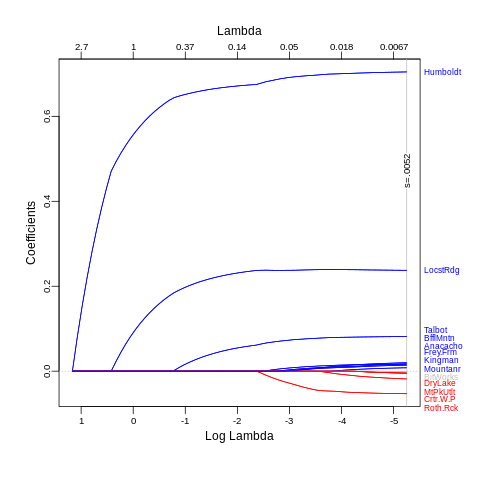

In [ ]:
%%R
cvfit<-cv.glmnet(as.matrix(wind[,-1]),wind[,1])

glmcoef<-coef(c,cvfit$lambda.min)
coef.increase<-dimnames(glmcoef[glmcoef[,1]>0,0])[[1]]
coef.decrease<-dimnames(glmcoef[glmcoef[,1]<0,0])[[1]]

#get ordered list of variables as they appear at smallest lambda
allnames<-names(coef(c)[,
    ncol(coef(c))][order(coef(c)[,
    ncol(coef(c))],decreasing=TRUE)])

#remove intercept
allnames<-setdiff(allnames,allnames[grep("Intercept",allnames)])

#assign colors
cols<-rep("gray",length(allnames))
cols[allnames %in% coef.increase]<-"blue"      # higher mpg is good
cols[allnames %in% coef.decrease]<-"red"        # lower mpg is not

plot_glmnet(c,label=TRUE,s=cvfit$lambda.min,col=cols)

#if you don't believe hp or am are non-zero look at glmcoef
glmcoef

In [ ]:
%%R
install.packages('esquisse')
library(esquisse)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘fastmap’, ‘miniUI’, ‘shiny’, ‘shinyWidgets’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/httpuv_1.5.4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1803508 bytes (1.7 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 